<a href="https://colab.research.google.com/github/ahmadzr8/Test_Datasets/blob/main/Route_Planner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
from IPython.display import clear_output
import time
from IPython.display import display
import numpy as np

In [3]:
# Step 2: Create a graph with cities 1-7
G = nx.Graph()
cities = [1, 2, 3, 4, 5, 6, 7]
lines = [
    (1, 2), (1, 3),
    (2, 4), (2, 5),
    (3, 5), (3, 6),
    (4, 7), (5, 7),
    (6, 7)
]

G.add_nodes_from(cities)
G.add_edges_from(lines)

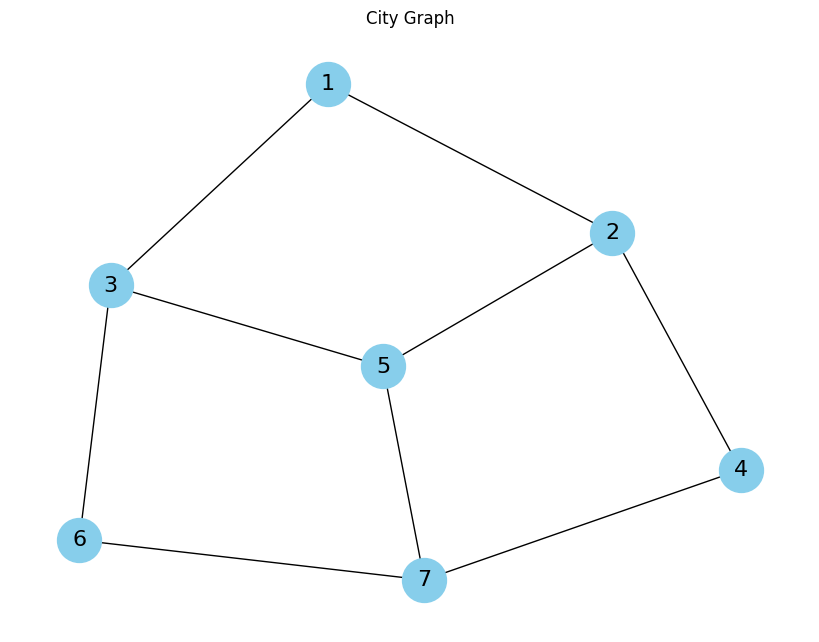

In [4]:
# Step 3: Draw initial graph
pos = nx.spring_layout(G, seed=42)  # fixed layout for consistency
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=16)
plt.title("City Graph")
plt.show()

In [5]:
# Step 4: Initialize decision table (Q-table)
# Rows = current city, Columns = possible next cities
Q_table = pd.DataFrame(index=cities, columns=cities, dtype=float)
Q_table[:] = np.nan

#As no rateing is avaiable the decision for each city to all neighbouring cities is initially set to zero
for src, dst in lines:
    Q_table.loc[src, dst] = 0
    Q_table.loc[dst, src] = 0
print("decision table:")
display(Q_table.fillna(" "))


decision table:


,1,2,3,4,5,6,7
1,,0.0,0.0,,,,
2,0.0,,,0.0,0.0,,
3,0.0,,,,0.0,0.0,
4,,0.0,,,,,0.0
5,,0.0,0.0,,,,0.0
6,,,0.0,,,,0.0
7,,,,0.0,0.0,0.0,


In [6]:
# A function to visualise a move on a route
def move_visualisation(driver_id,route,current_city,possible_moves,next_city,rate,Q_table) :
    clear_output(wait=True)
    plt.figure(figsize=(8,6))

    node_colors = ['lightgreen' if n in route else 'skyblue' for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=16)
    plt.title(f"Driver: {driver_id} - Current City: {current_city} - Possible Next Cities: {possible_moves} - Chosen City: {next_city} - Given Rate: {rate}")
    route_edges = list(zip(route[:-1], route[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, width=3, edge_color='red')

    plt.axis('off')
    plt.show() #show the route

    print("Q-table after this driver trip:")
    display(Q_table.fillna(" ")) # Print Q-table



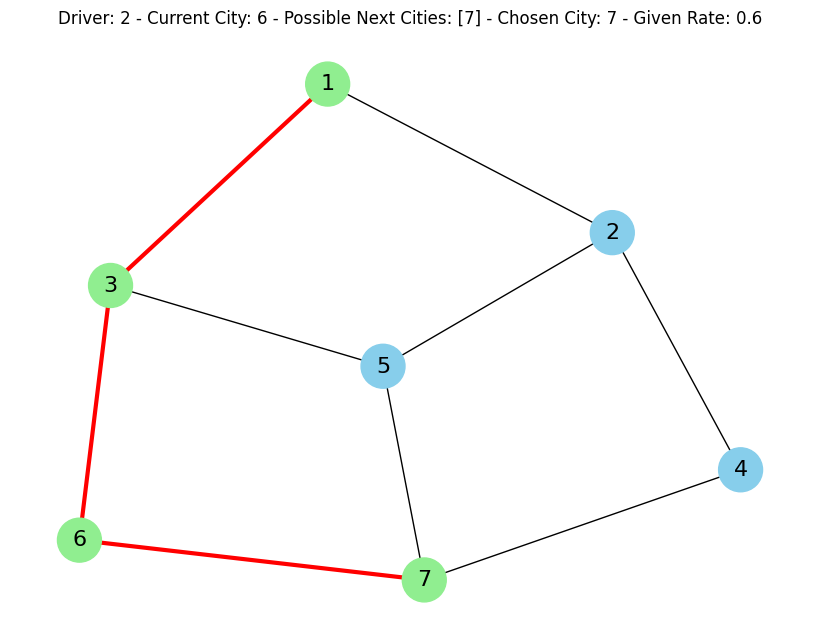

Q-table after this driver trip:


,1,2,3,4,5,6,7
1,,-0.67,-0.25,,,,
2,0.0,,,-0.94,0.55,,
3,0.0,,,,0.0,0.19,
4,,0.0,,,,,-0.41
5,,0.0,-0.8,,,,0.0
6,,,0.0,,,,0.39
7,,,,0.0,0.0,0.0,


In [7]:
# Step 5: Simulate 3 drivers travelling from city 1 to city 7
Driver_count = 3

for driver_id in range(Driver_count):
    current_city = 1  # Set the starting city as the driver's current location
    goal_city = 7     # Define the goal city
    route = [current_city]  # Initialize the route with the starting city

    # Continue moving until the driver reaches the goal city
    while current_city != goal_city:

        # Get the list of neighbouring cities that have not yet been visited in the current route
        possible_moves = list(set(G.neighbors(current_city)) - set(route))

        # Select the neighbour with the highest decision value in the Q-table as the next city
        next_city = max(possible_moves, key=lambda move: Q_table.loc[current_city, move] if pd.notna(Q_table.loc[current_city, move]) else -np.inf)


        # Assign a rate to the move from current city to next city
        # Here, we assue a random float value in [-1, 1] as the rate; negative values are penalties, positive values are rewards
        rate = round(random.uniform(-1, 1), 2)

        # Update the Q-table with the new rate for moving from current city to next city
        Q_table.loc[current_city, next_city] += rate

        # Append the next city to the driver's route
        route.append(next_city)

        # Visualize the current step of the driver
        move_visualisation(driver_id, route, current_city, possible_moves, next_city, rate, Q_table)

        # Move the driver to the next city
        current_city = next_city

        # Optional: Pause to allow visualization before the next step
        time.sleep(20)
